### Importing Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd


import helper_utils

# This line ensures that your results are reproduceable an consistent every time
torch.manual_seed(42)

### Simple addition using pytorch

In [3]:
a = torch.tensor(2.0)
b = torch.tensor(3.0)

result = a + b

print(result)

tensor(5.)


In [4]:
# a = framework.placeholder(float32)
# b = framework.placeholder(float32)

# result = framework.add(a,b)

# with framework.Executor() as executor:
#   actual_result = executor.run(result, data_dictionary=({a: 2.0, b:3.0}))

### Stage 1 & 2: Data Ingestion and Preparation

In [5]:
# Distances in miles for recent bike deliveries
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([[6.96], [12.11], [16.77], [22.11]], dtype= torch.float32)

### Stage 3: Model Building

In [6]:
# Create a model with one input (distance) and one output (time)
model = nn.Sequential(nn.Linear(1, 1))

### Stage 4: Training

In [7]:
# Define the loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Training Loop
for epoch in range(500):
  # Reset the optimizers gradients
  optimizer.zero_grad()
  # Make predictions (forward pass) by defining input in the model  i.e distances is the input
  outputs = model(distances)
  # Calculate the loss
  loss = loss_function(outputs, times)
  # Calculate adjustments (backward pass)
  loss.backward()
  # Update the model's parameters
  optimizer.step()
  # Print loss every 50 epochs
  if (epoch + 1) % 50 == 0:
    print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

Epoch 50: Loss = 0.02925119921565056
Epoch 100: Loss = 0.026688646525144577
Epoch 150: Loss = 0.02479221113026142
Epoch 200: Loss = 0.02338692918419838
Epoch 250: Loss = 0.02234555408358574
Epoch 300: Loss = 0.021574076265096664
Epoch 350: Loss = 0.021002329885959625
Epoch 400: Loss = 0.020578857511281967
Epoch 450: Loss = 0.020265158265829086
Epoch 500: Loss = 0.02003253996372223


### Visualizing the Training Results

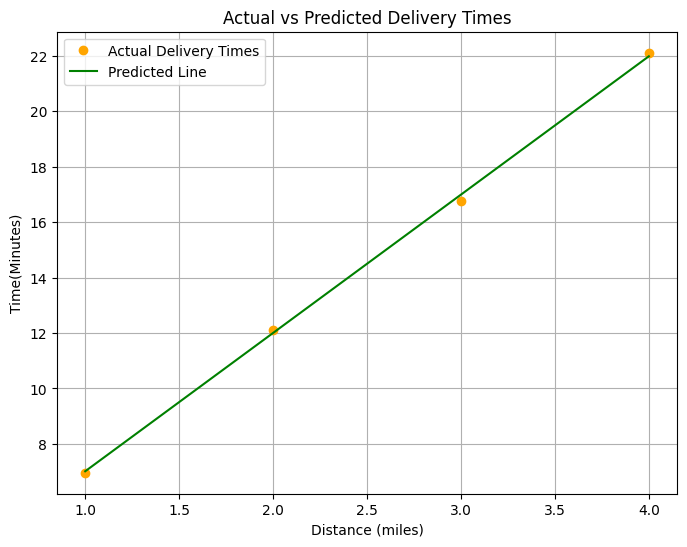

In [9]:
helper_utils.plot_results(model, distances, times)

In [10]:
distance_to_predict1 = 7.0
distance_to_predict2 = 2

In [11]:
# use the torch.no_grad() context manager for efficient predictions
with torch.no_grad():
  # Convert the python variable into a 2D pytorch tensor that the model expects
  new_distance = torch.tensor([[distance_to_predict2]], dtype=torch.float32)

  # Pass the new data tot he trained model to get a prediction
  predicted_time = model(new_distance)

  # Use .item() to extract the scalar value from the tensor for printing
  print(f"Prediction for a {distance_to_predict2}-mile delivery: {predicted_time.item():.1f} minutes")

  # Use the scalar value in a conditional statement to make the final decision
  if predicted_time.item() > 30:
    print("\nDecision: Do not take the job. You will be late")
  else:  
    print("\nDecision: Take the job. You can make it")

Prediction for a 2-mile delivery: 12.0 minutes

Decision: Take the job. You can make it


### Inspecting the Model's Learning

In [12]:
# Access the first (and only) layer in the sequential model
layer = model[0]

# Get weights and bias
weights = layer.weight.data.numpy()
bias = layer.bias.data.numpy()

print(f"Weight: {weights}")
print(f"Bias: {bias}")

Weight: [[4.989601]]
Bias: [2.0229154]


### Testing Model on more complex data

In [13]:
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([[1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]], dtype=torch.float32)

In [14]:
# Use the already-trained linear model to make predictions
with torch.no_grad():
  predictions = model(new_distances)

In [15]:
# Calculate the new loss
new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 2432.45


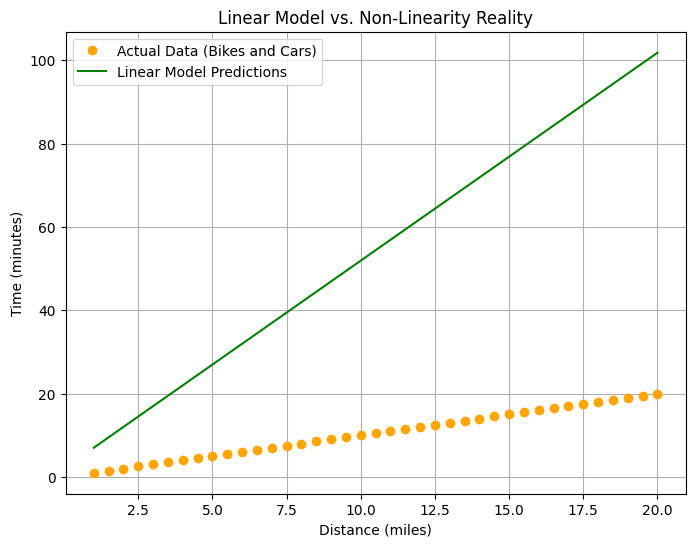

In [16]:
helper_utils.plot_nonlinear_comparison(model, new_distances, new_times)

### Adding activation function to the previous model built

#### Imports